In [1]:
%%bigquery flights_df --verbose
SELECT date,
       airline,
       departure_airport,
       arrival_airport,
       departure_lat,
       departure_lon,
       arrival_lat,
       arrival_lon,
       departure_delay,
       arrival_delay
FROM `bigquery-samples.airline_ontime_data.flights`
Where departure_airport = 'SFO' AND date >= '2009-01-01' AND date <= '2009-12-31'


Executing query with job ID: 307f8aab-dfdf-443c-85f7-68bd0cfc7731
Query executing: 0.50s
Query complete after 0.84s


Downloading: 100%|██████████| 134990/134990 [00:01<00:00, 94771.63rows/s]


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


print(flights_df.shape)

flights_df.head()


(134990, 10)


,date,airline,departure_airport,arrival_airport,departure_lat,departure_lon,arrival_lat,arrival_lon,departure_delay,arrival_delay
0,2009-03-19,B6,SFO,AUS,37.61,-122.37,30.19,-97.67,-5.0,-2.0
1,2009-03-18,B6,SFO,AUS,37.61,-122.37,30.19,-97.67,-10.0,-18.0
2,2009-03-20,B6,SFO,AUS,37.61,-122.37,30.19,-97.67,-4.0,-10.0
3,2009-03-21,B6,SFO,AUS,37.61,-122.37,30.19,-97.67,0.0,8.0
4,2009-03-22,B6,SFO,AUS,37.61,-122.37,30.19,-97.67,-5.0,-25.0


<AxesSubplot:xlabel='departure_delay', ylabel='arrival_delay'>

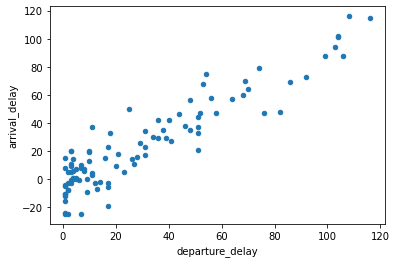

In [3]:
flights_processed_df = (flights_df
                        .query('1 <= departure_delay <= 120')
                        .dropna()
                        .filter(['departure_delay', 'arrival_delay'])
                       )

(flights_processed_df
 .sample(n=100, random_state = 123)
 .plot.scatter('departure_delay', 'arrival_delay'))


In [4]:
train_df = flights_processed_df.sample(frac=0.8,random_state=123)
test_df = flights_processed_df.drop(train_df.index)

train_labels = train_df.pop('arrival_delay')
test_labels = test_df.pop('arrival_delay')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38228 entries, 82669 to 21400
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   departure_delay  38228 non-null  float64
dtypes: float64(1)
memory usage: 597.3 KB


In [11]:
train_df.shape

(38228, 1)

In [6]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    
    # Adds a densely-connected layer with 1 unit to the model:
    tf.keras.layers.Dense(1, activation='linear', input_shape = [len(train_df.keys())])
    
])


model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='mean_squared_error',
              metrics=['mean_absolute_error', 'mean_squared_error'],
             )


model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2021-11-24 07:39:06.774865: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2200220000 Hz
2021-11-24 07:39:06.775853: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x561a84833f80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-11-24 07:39:06.775890: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-11-24 07:39:06.776058: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
history = model.fit(train_df, train_labels, 
                    epochs=10,
                    callbacks=[tf.keras.callbacks.TensorBoard("logs/simple-regression")])

Epoch 1/10


2021-11-24 07:39:06.808189: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.


   1/1195 [..............................] - ETA: 0s - loss: 446.5667 - mean_absolute_error: 18.8717 - mean_squared_error: 446.5667WARNING:tensorflow:From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
  63/1195 [>.............................] - ETA: 2s - loss: 506.4531 - mean_absolute_error: 17.8268 - mean_squared_error: 506.4531

2021-11-24 07:39:07.548725: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2021-11-24 07:39:07.560701: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/simple-regression/train/plugins/profile/2021_11_24_07_39_07
2021-11-24 07:39:07.562229: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/simple-regression/train/plugins/profile/2021_11_24_07_39_07/tensorflow-2-3-20211124-135420.trace.json.gz
2021-11-24 07:39:07.566817: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/simple-regression/train/plugins/profile/2021_11_24_07_39_07
2021-11-24 07:39:07.567126: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for memory_profile.json.gz to logs/simple-regression/train/plugins/profile/2021_11_24_07_39_07/tensorflow-2-3-20211124-135420.memory_profile.json.gz
2021-11-24 07:39:07.567533: I tensorflow/p

1195/1195 [==============================] - 2s 2ms/step - loss: 225.6781 - mean_absolute_error: 11.2320 - mean_squared_error: 225.6781
Epoch 2/10
1195/1195 [==============================] - 2s 2ms/step - loss: 167.3015 - mean_absolute_error: 9.5143 - mean_squared_error: 167.3015
Epoch 3/10
1195/1195 [==============================] - 2s 2ms/step - loss: 164.3759 - mean_absolute_error: 9.3840 - mean_squared_error: 164.3759
Epoch 4/10
1195/1195 [==============================] - 2s 2ms/step - loss: 162.2658 - mean_absolute_error: 9.2842 - mean_squared_error: 162.2658
Epoch 5/10
1195/1195 [==============================] - 2s 2ms/step - loss: 160.8819 - mean_absolute_error: 9.2180 - mean_squared_error: 160.8819
Epoch 6/10
1195/1195 [==============================] - 2s 2ms/step - loss: 159.9850 - mean_absolute_error: 9.1718 - mean_squared_error: 159.9850
Epoch 7/10
1195/1195 [==============================] - 3s 3ms/step - loss: 159.4396 - mean_absolute_error: 9.1441 - mean_squared_erro

In [8]:
test_predictions = model.predict(test_df).flatten()
results_df = pd.DataFrame({'Predicted': test_predictions, 'Actual': test_labels})
results_df.head(5)


,Predicted,Actual
8,7.931259,7.0
18,18.822500,11.0
51,0.010357,-7.0
68,12.881823,31.0
94,82.189720,90.0


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

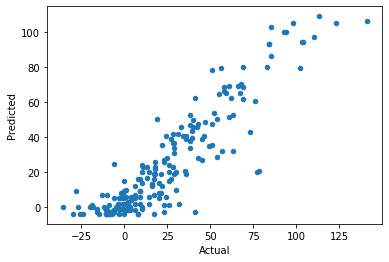

In [9]:
(results_df
 .sample(n=200, random_state = 123)
 .plot.scatter('Actual', 'Predicted')
)

9.087873803979248

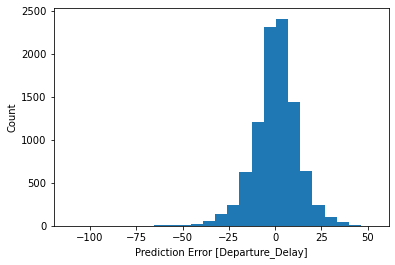

In [10]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Departure_Delay]")
_ = plt.ylabel("Count")


test_mae = abs(error).mean()

test_mae
